In [1]:
import numpy as np
import matplotlib.pyplot as plt 

data = np.genfromtxt("13 months smooth.csv", delimiter=';')
år = data[6:-6,0]
måned = data[6:-6,1]
dato_fraction = data[6:-6,2]
SN = data[6:-6,3]
std = data[6:-6,4]
N = data[6:-6,5]
definite = data[6:-6,6]

for i in range(len(N)):
    if N[i]==0:
        N[i]=1

usikkerhed = abs(std)/np.sqrt(abs(N))

Proxy_minimum_dato = np.array([1755+2/13 , 1766+6/13 , 1775+6/13 , 1784+9/13 , 1798+4/13 , 1810+7/13 , 1823+5/13 , 1833+11/13 , 1843+7/13, 1855+12/13,
                    1867+3/13 , 1878+12/13 , 1890+3/13 , 1902+1/13 , 1913+7/13 , 1923+8/13 , 1933+9/13 , 1944+2/13 , 1954+4/13 , 1964+10/12,
                    1976+3/13 , 1986+9/13 , 1996+8/13 , 2008+12/13 , 2019+12/13])

In [2]:
Cykler = []
for k in range(len(Proxy_minimum_dato)-1):
    Maske=(Proxy_minimum_dato[k] < dato_fraction) & (dato_fraction < Proxy_minimum_dato[k+1])
    x = dato_fraction[Maske]
    y = SN[Maske]
    u = usikkerhed[Maske]
    Cykler.append([x,y,u])
    if k == 23:
        Maske=(Cykler[23][0][-1] < dato_fraction) & (dato_fraction < 2025)
        x = dato_fraction[Maske]
        y = SN[Maske]
        u = usikkerhed[Maske]
        Cykler.append([x,y,u])

Maximum_dato = []
Maximum_plet = []
Maximum_usikkerhed = []

for n in range( len(Cykler) ):
    Maximum_dato.append(Cykler[n][0][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ])
    Maximum_plet.append(Cykler[n][1][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ])
    Maximum_usikkerhed.append(Cykler[n][2][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ])

Maximum_dato = np.array(Maximum_dato)
Maximum_plet = np.array(Maximum_plet)
Maximum_usikkerhed = np.array(Maximum_usikkerhed)

Cykler_max = []
for k in range( len(Maximum_dato)-1 ):
    Maske=(Maximum_dato[k] < dato_fraction) & (dato_fraction < Maximum_dato[k+1])
    x = dato_fraction[Maske]
    y = SN[Maske]
    u = usikkerhed[Maske]
    Cykler_max.append([x,y,u])

Minimum_dato = []
Minimum_plet = []
Minimum_usikkerhed = []

for n in range( len(Cykler_max) ):
    Minimum_dato.append(Cykler_max[n][0][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ])
    Minimum_plet.append(Cykler_max[n][1][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ])
    Minimum_usikkerhed.append(Cykler_max[n][2][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ])

[1761.455 1769.707 1778.371 1788.124 1805.123 1816.373 1829.874 1837.204
 1848.124 1860.124 1870.623 1883.958 1894.042 1906.123 1917.623 1928.29
 1937.288 1947.371 1958.204 1968.874 1979.958 1989.874 2001.874 2014.288
 2023.453]
[144.1 193.  264.3 235.3  82.   81.2 119.2 244.9 219.9 186.2 234.  124.4
 146.5 107.1 175.7 130.2 198.6 218.7 285.  156.6 232.9 212.5 180.3 116.4
 125.2]
[1.         1.         1.         1.         1.         1.
 3.16593713 5.71576766 5.21418184 3.10111215 3.08921119 2.24506628
 1.93973726 1.73863658 2.11934256 1.8622567  2.30043474 1.84993461
 2.02953991 1.53362316 1.83197408 0.54152982 0.47870158 0.37195955
 0.54349298]
[18.6, 12.0, 15.9, 5.3, 0.0, 0.2, 12.2, 17.6, 6.0, 9.9, 3.7, 8.3, 4.5, 2.5, 9.4, 5.8, 12.9, 5.1, 14.3, 17.8, 13.5, 11.2, 2.2, 1.8]


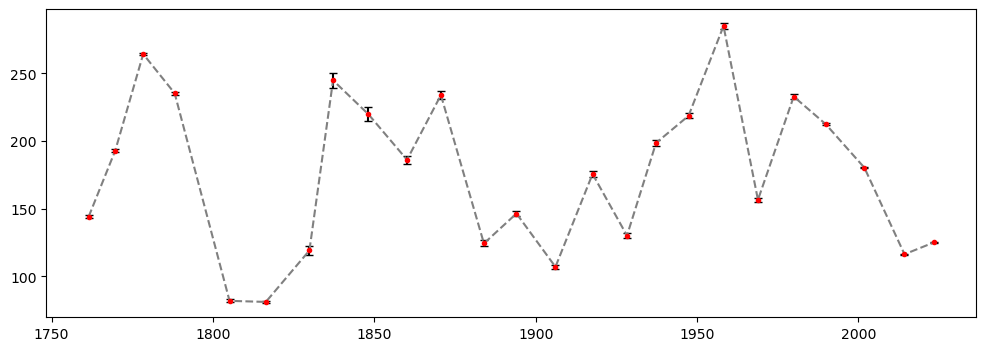

In [10]:
plt.figure(figsize=[12,4])
plt.errorbar(Maximum_dato, Maximum_plet, fmt='.', yerr=Maximum_usikkerhed, ecolor='black', capsize=3, color='red')
plt.plot(Maximum_dato, Maximum_plet, linestyle='dashed', color='gray')
print(Maximum_dato)
print(Maximum_plet)
print(Maximum_usikkerhed)

print(Minimum_plet)


In [11]:
for i in range(len(Minimum_dato)):
    print(i+1)
    print(f'{Maximum_plet[i]} +/- {Maximum_usikkerhed[i]} den {Maximum_dato[i]}')


1
144.1 +/- 1.0 den 1761.455
2
193.0 +/- 1.0 den 1769.707
3
264.3 +/- 1.0 den 1778.371
4
235.3 +/- 1.0 den 1788.124
5
82.0 +/- 1.0 den 1805.123
6
81.2 +/- 1.0 den 1816.373
7
119.2 +/- 3.1659371274137524 den 1829.874
8
244.9 +/- 5.715767664977296 den 1837.204
9
219.9 +/- 5.214181844517154 den 1848.124
10
186.2 +/- 3.101112147556766 den 1860.124
11
234.0 +/- 3.0892111948605283 den 1870.623
12
124.4 +/- 2.2450662753346866 den 1883.958
13
146.5 +/- 1.9397372618891693 den 1894.042
14
107.1 +/- 1.7386365758424451 den 1906.123
15
175.7 +/- 2.119342563915944 den 1917.623
16
130.2 +/- 1.8622566955175646 den 1928.29
17
198.6 +/- 2.3004347415216975 den 1937.288
18
218.7 +/- 1.8499346108757817 den 1947.371
19
285.0 +/- 2.029539912902557 den 1958.204
20
156.6 +/- 1.5336231610144653 den 1968.874
21
232.9 +/- 1.831974080673104 den 1979.958
22
212.5 +/- 0.5415298195432504 den 1989.874
23
180.3 +/- 0.4787015837521712 den 2001.874
24
116.4 +/- 0.3719595535337418 den 2014.288


-54.82994158589625 0.05957457886790153 164.1763598871205 -13.650441206639972 0.19966898622977666


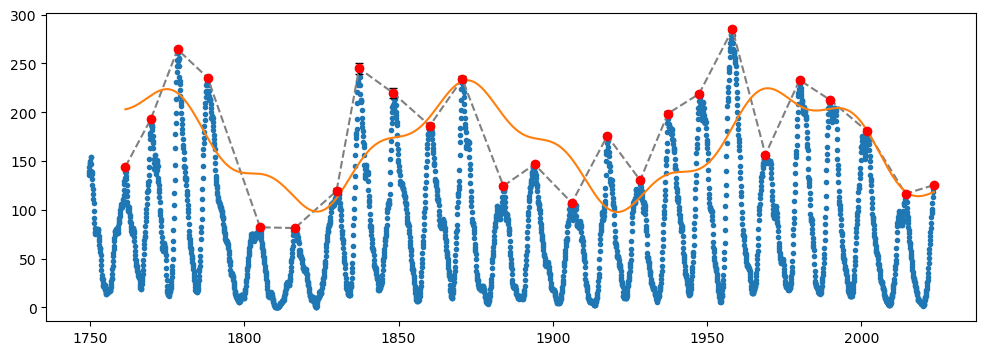

In [4]:
from scipy.optimize import curve_fit

def func(x, a, b, c, d, e):
    return a*np.sin(x*b)+c + d*np.cos(e*x)

par, cov = curve_fit(func, Maximum_dato, Maximum_plet, p0=[1000, 0.06, 500, 50, 0.2], sigma=Maximum_usikkerhed, absolute_sigma=True, maxfev=8000)
xx = np.linspace(Maximum_dato[0], Maximum_dato[-1], 1000)
yy = func(xx, *par)
print(*par)

plt.figure(figsize=[12,4])
plt.plot(dato_fraction, SN,'.')
plt.errorbar(Maximum_dato, Maximum_plet, fmt='o', yerr=Maximum_usikkerhed, ecolor='black', capsize=3, color='red')
plt.plot(Maximum_dato, Maximum_plet, linestyle='dashed', color='gray')
plt.plot(xx,yy)


31.511531485380484 0.05015438377763388 168.65920789748984


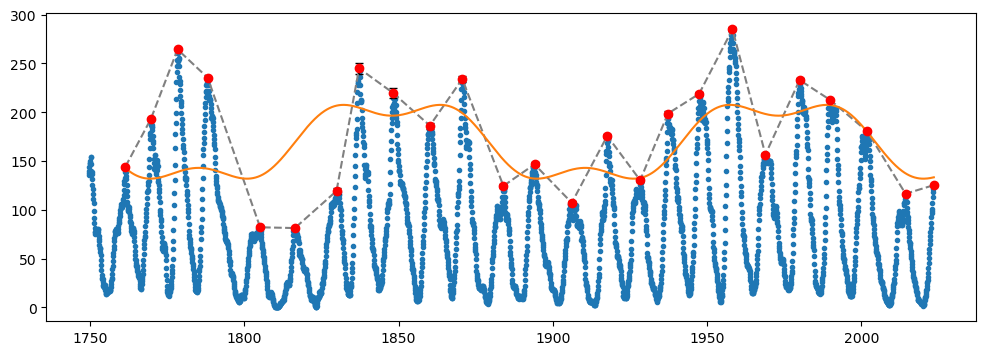

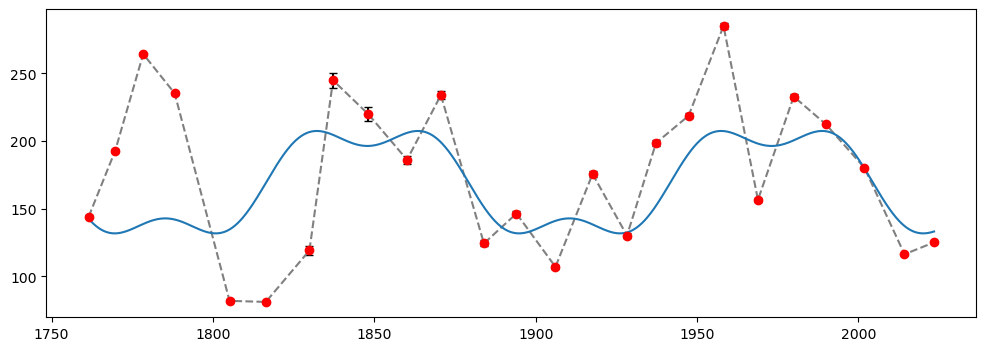

In [5]:
from scipy.optimize import curve_fit

def fourier(x, a, b, c):
    return (1-4/np.pi*a*(np.sin(b*x) + np.sin(3*b*x)/3)) + c

par, cov = curve_fit(fourier, Maximum_dato, Maximum_plet, p0=[5000, 0.05, 2], sigma=Maximum_usikkerhed, absolute_sigma=True, maxfev=8000)
xx = np.linspace(Maximum_dato[0], Maximum_dato[-1], 1000)
yy = fourier(xx, *par)
print(*par)

plt.figure(figsize=[12,4])
plt.plot(dato_fraction, SN,'.')
plt.errorbar(Maximum_dato, Maximum_plet, fmt='o', yerr=Maximum_usikkerhed, ecolor='black', capsize=3, color='red')
plt.plot(Maximum_dato, Maximum_plet, linestyle='dashed', color='gray')
plt.plot(xx,yy)
plt.show()

plt.figure(figsize=[12,4])
plt.errorbar(Maximum_dato, Maximum_plet, fmt='o', yerr=Maximum_usikkerhed, ecolor='black', capsize=3, color='red')
plt.plot(Maximum_dato, Maximum_plet, linestyle='dashed', color='gray')
plt.plot(xx,yy)
plt.show()



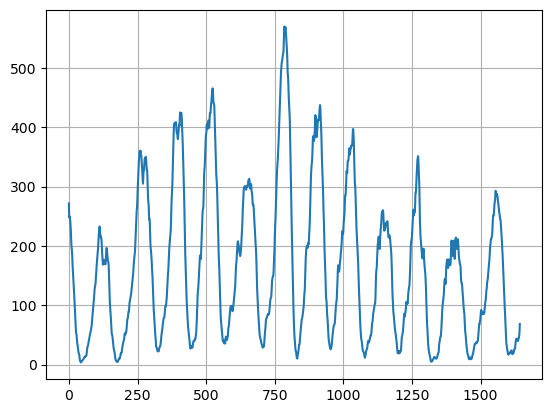

In [6]:
from scipy.fft import fft, fftfreq
y = fft(SN)
# Number of sample points
N = len(SN)

# Sample spacing
T = 1 / len(SN)
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()